### 1. Import library

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

### 2. Load iris dataset

In [24]:
iris = load_iris()

# Use all 4 features for clustering
X = iris.data
y=iris.target

print("Feature names:", iris.feature_names)
print("Shape:", X.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape: (150, 4)


In [25]:
# convert to Dataframe for readabliity
df = pd.DataFrame(X, columns = iris.feature_names)
df['species'] = y
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8  

### 3. Scale All Features

In [7]:
# StandardScaler() performs feature standardization, convert into mean=0, standard deviation=1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Run DBSCAN

In [26]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
print(labels)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


In [27]:
### silhouette score of the model
data = df.drop(columns =['species'])


In [28]:
data.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]>

In [29]:
silhouette_score(data, dbscan.labels_, metric='euclidean', sample_size=None)

0.5707047523313128

In [31]:
# Number of clusters in labels, ignoring noise points
# set(dbscan.labels_) -> extract unique cluster labels.
# len(set(dbscan.labels_)) -> counts unique labels
# (1 if -1 in dbscan.labels_ else 0) -> if -1 exists -> substract 1, otherwise substract 0
n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0) 
n_clusters_

2

### 5. Scatter Plot (Only Sepal Length & Sepal Width)

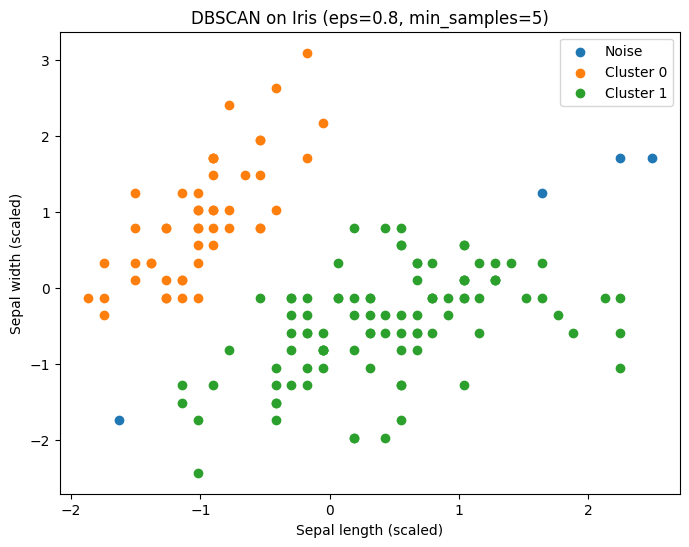

In [33]:
plt.figure(figsize=(8,6))

unique_labels = np.unique(labels)

for label in unique_labels:
    cluster_name = 'Noise' if label == -1 else f'Cluster {label}'
    
    plt.scatter(
        X_scaled[labels == label, 0], # , 0 -> first feature-> sepal length
        X_scaled[labels == label, 1], # , 1-> second feature -> sepal width
        label=cluster_name
    )

plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.title("DBSCAN on Iris (eps=0.8, min_samples=5)")
plt.legend()
plt.show()

### 6. Tune DBSCAN Parameters (Optional)

In [34]:
# Loop through various values of eps and min_samples
results = []

# define a range of eps and min_samples values to loop through
eps_values = np.arange(.1,2,.1)
min_samples_values = np.arange(2, 10, 1)

# loop through the combination of eps and min_samples
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(data)
        labels = dbscan.labels_
        
        # count the number of clusters (excluding noise points labeled as -1)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        
        # count the number of noise points (labeled as -1)
        n_noise = list(labels).count(-1)
        
        # calculate the silhouette score
        if n_clusters > 1:  # silhouette score requires at least 2 clusters
            silhouette = silhouette_score(data, labels, metric='euclidean', sample_size=None)
        else:
            silhouette = None
        
        results.append([eps, min_samples, n_clusters, n_noise, silhouette])

# Put the results in a dataframe
dbscan_results = pd.DataFrame(results, columns=["Eps", "Min Samples", "Number of Clusters",
                                                "Number of Noise Points", "Silhouette Score"])

dbscan_results.head()

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
0,0.1,2,4,142,-0.533442
1,0.1,3,0,150,NaN
2,0.1,4,0,150,NaN
3,0.1,5,0,150,NaN
4,0.1,6,0,150,NaN


In [15]:
# view the silhouette scores (higher is better)
dbscan_results.sort_values('Silhouette Score', ascending=False)

,Eps,Min Samples,Number of Clusters,Number of Noise Points,Silhouette Score
115,1.5,5,2,0,0.686735
114,1.5,4,2,0,0.686735
113,1.5,3,2,0,0.686735
112,1.5,2,2,0,0.686735
111,1.4,9,2,0,0.686735
...,...,...,...,...,...
147,1.9,5,1,0,NaN
148,1.9,6,1,0,NaN
149,1.9,7,1,0,NaN
150,1.9,8,1,0,NaN


In [16]:
dbscan2 = DBSCAN(eps=1.5, min_samples=5)
labels2 = dbscan2.fit_predict(X_scaled)

In [17]:
silhouette_score(data, dbscan2.labels_, metric='euclidean', sample_size=None)

0.6867350732769781

In [35]:
labels2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

End of script.